In [24]:
# This program is me playing around with the ABI data from the goes16 webserver

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

In [2]:
ABI = nc.Dataset('/localdata/cases/20190403/ABI/CODC/OR_ABI-L2-CODC-M6_G16_s20190932041196_e20190932043569_c20190932045271.nc','r')

In [3]:
ABI

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: CONUS
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CODC-M6_G16_s20190932041196_e20190932043569_c20190932045271.nc
    iso_series_metadata_id: 49b3d350-afec-11e1-afa6-0800200c9a66
    title: ABI L2 Cloud Optical Depth at 640 nm
    summary: The Cloud Optical Depth product consists of pixels containing t

In [7]:
var = ABI.variables['COD'][:,:]
x = ABI.variables['x'][:]
y = ABI.variables['y'][:]
#sza = ABI.variables['solar_zenith_angle'][:]
#print (sza)
print (x)

[-0.101332 -0.101276 -0.10122  ...  0.0385    0.038556  0.038612]


In [5]:
time_string = ABI.time_coverage_end
time = datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%S.%fZ')
print (time)

2019-04-03 20:43:56.900000


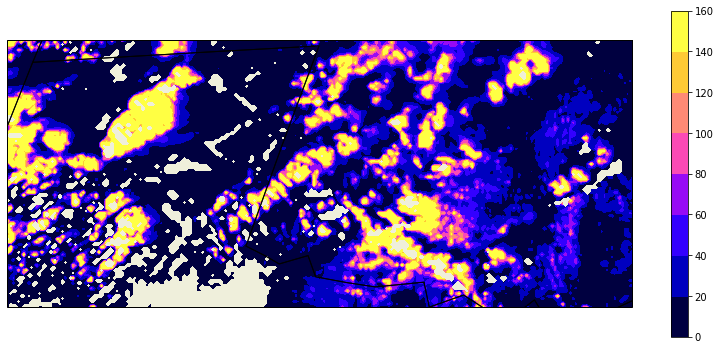

In [6]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))

plt.contourf(x*35786023.0,y*35786023.0,var,cmap=plt.get_cmap('gnuplot2'))
ax.set_extent([-102.24, -96.80, 34.10, 36.40])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, zorder=8)
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

ax = plt.colorbar()
plt.show()

In [42]:
print (x)

[-0.10122    -0.10094    -0.10066    -0.10038    -0.1001     -0.09982
 -0.09954    -0.09925999 -0.09897999 -0.09869999 -0.09841999 -0.09813999
 -0.09785999 -0.09757999 -0.09729999 -0.09702    -0.09674    -0.09646
 -0.09618    -0.0959     -0.09562    -0.09534    -0.09506    -0.09478
 -0.0945     -0.09422    -0.09394    -0.09366    -0.09338    -0.0931
 -0.09282    -0.09254    -0.09226    -0.09198    -0.0917     -0.09141999
 -0.09113999 -0.09085999 -0.09057999 -0.09029999 -0.09001999 -0.08973999
 -0.08946    -0.08917999 -0.0889     -0.08862    -0.08834    -0.08806
 -0.08778    -0.0875     -0.08722    -0.08694    -0.08666    -0.08638
 -0.0861     -0.08582    -0.08554    -0.08526    -0.08498    -0.0847
 -0.08442    -0.08414    -0.08386    -0.08357999 -0.08329999 -0.08301999
 -0.08273999 -0.08245999 -0.08217999 -0.0819     -0.08161999 -0.08134
 -0.08105999 -0.08078    -0.08049999 -0.08022    -0.07994    -0.07966
 -0.07938    -0.0791     -0.07882    -0.07854    -0.07826    -0.07798
 -0.0777  

In [43]:
reshaped = np.reshape(var,len(x)*len(y))

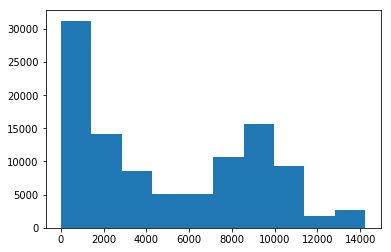

In [44]:
plt.hist(reshaped)
plt.show()

In [45]:
tester = nc.Dataset('/home/kevin.thiel/Downloads/OR_ABI-L1b-RadF-M6C13_G16_s20191351200335_e20191351210055_c20191351210117.nc', 'r')

In [46]:
tester

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: WCDAS
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    title: ABI L1b Radiances
    summary: Single emissive band ABI L1b Radiance Products are digital maps of outgoing radiance values at the top of the atmosphere for IR bands.
    keywords: SPECTRAL/ENGINEERING > INFRARED WAVELENGTHS > INFRARED RADIANCE
    keywords_vocabul

In [47]:
rad = tester.variables['Rad'][:,:]
x2 = tester.variables['x'][:]
y2 = tester.variables['y'][:]

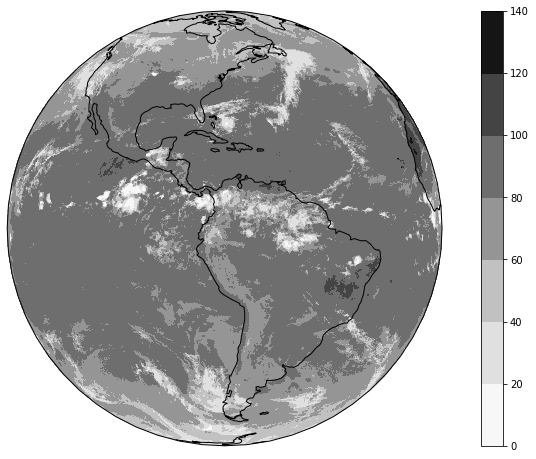

In [51]:
plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))

plt.contourf(x2*35786023.0,y2*35786023.0,rad,cmap=plt.get_cmap('Greys'))
ax.coastlines(resolution='110m')
plt.colorbar()
plt.show()